# Fitting of Atomic Spectra

## Part 1
Determine the electron density from the FWHM of the measured Balmer series hydrogen-alpha line-of-sight data `!!!9average.dat` and from the hydrogen-beta data `!!!9hbeta.dat` using 0.1-nm spectral resolution

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, VoigtModel

In [74]:
halpha_file = '!!!9average.dat.txt'
hbeta_file = '!!!9hbeta.dat.txt'

In [75]:
halpha = np.loadtxt(halpha_file)
hbeta = np.loadtxt(hbeta_file)

In [76]:
alpha_model = LorentzianModel()
pars = alpha_model.guess(halpha[:,1], halpha[:,0])
alpha_out = alpha_model.fit(halpha[:,1], pars, x=halpha[:,0])
print(alpha_out.fit_report(min_correl=0.25))

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 1001
    # variables        = 3
    chi-square         = 1051485.67
    reduced chi-square = 1053.59286
    Akaike info crit   = 6969.91683
    Bayesian info crit = 6984.64309
[[Variables]]
    sigma:      1.39846027 +/- 0.00334829 (0.24%) (init = 1.2565)
    center:     656.239662 +/- 0.00235980 (0.00%) (init = 656.2525)
    amplitude:  12244.1376 +/- 20.7221605 (0.17%) (init = 13348.91)
    fwhm:       2.79692054 +/- 0.00669658 (0.24%) == '2.0000000*sigma'
    height:     2786.94383 +/- 4.70609775 (0.17%) == '0.3183099*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(sigma, amplitude) =  0.709



Text(0.5, 1.0, 'Hydrogen Alpha Line')

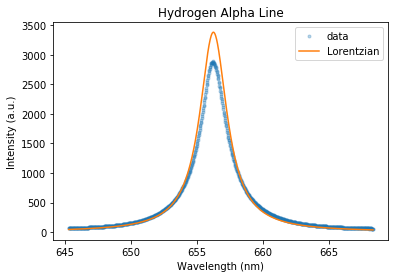

In [77]:
xmin = np.min(halpha[:,0])
xmax = np.max(halpha[:,0])
plt.plot(halpha[:,0], halpha[:,1], '.', alpha=0.3, label='data')
plt.plot(halpha[:,0], alpha_out.eval(pars, x=halpha[:,0]), label='Lorentzian')
plt.legend(loc='best')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (a.u.)")
plt.title("Hydrogen Alpha Line")

The full-width-half-max for this peak is $2.79692054 \pm 0.00669658$nm

In [78]:
beta_model = LorentzianModel()
pars = beta_model.guess(hbeta[:,1], hbeta[:,0])
beta_out = beta_model.fit(hbeta[:,1], pars, x=hbeta[:,0])
print(beta_out.fit_report(min_correl=0.25))

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 1001
    # variables        = 3
    chi-square         = 450042.482
    reduced chi-square = 450.944371
    Akaike info crit   = 6120.45083
    Bayesian info crit = 6135.17709
[[Variables]]
    sigma:      5.24172247 +/- 0.02132353 (0.41%) (init = 4.4611)
    center:     486.582666 +/- 0.01347300 (0.00%) (init = 486.735)
    amplitude:  10301.0733 +/- 29.4987701 (0.29%) (init = 8734.764)
    fwhm:       10.4834449 +/- 0.04264706 (0.41%) == '2.0000000*sigma'
    height:     625.545064 +/- 1.63105591 (0.26%) == '0.3183099*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(sigma, amplitude) =  0.770



Text(0.5, 1.0, 'Hydrogen Beta Line')

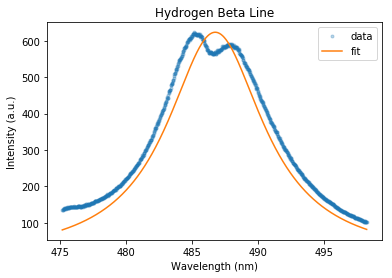

In [79]:
xmin = np.min(hbeta[:,0])
xmax = np.max(hbeta[:,0])
plt.plot(hbeta[:,0], hbeta[:,1], '.', alpha=0.3, label='data')
plt.plot(hbeta[:,0], beta_out.eval(pars, x=hbeta[:,0]), label='fit')
plt.legend(loc='best')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (a.u.)")
plt.title("Hydrogen Beta Line")

The FWHM for this peak is $10.4834449 \pm 0.04264706$nm